# Examining risk factors associated with characteristics of a project

> using project metadata retrieved from World of Code
> [MongoDB database](https://github.com/woc-hack/tutorial#mongo-database)
> with the help of `projects_stats/retrieve_metadata_from_WoC_mongodb.py` script

MongoDB tables contain the summary information about authors and projects,
to enable selection of subsets for later analysis.

See [MSR 2023 CVE](https://docs.google.com/spreadsheets/d/1yUXKMNrwUA4t0wH4_c8kVLwmEKmOGjt9sj_nHUofmGo) Google Sheet

-----
Imports

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring `data/unique_project_info.parquet`

In [2]:
df_filename='../../data/unique_project_info.parquet'
df_filename

'../../data/unique_project_info.parquet'

In [3]:
df=pd.read_parquet(df_filename)
df

,RootFork,EarliestCommitDate,LatestCommitDate,NumActiveMon,NumAuthors,NumCore,CommunitySize,NumCommits,NumBlobs,NumFiles,NumForks,NumStars
ProjectID,,,,,,,,,,,,
Jackeagle_kernel_msm-3.18,torvalds_linux,1988-01-05 07:17:15+00:00,2085-06-18 15:57:19+00:00,364,109725,3769,112489,36468389,20588737,7984434,237104,201441
bloomberg_chromium.bb,FFmpeg_FFmpeg,1988-01-05 07:17:15+00:00,2097-03-18 18:54:57+00:00,305,39637,2083,63661,6686322,12676680,7181765,63294,219233
buildroot_buildroot,buildroot_buildroot,2000-05-14 04:16:35+00:00,2021-11-24 02:32:46+00:00,259,4347,239,4897,375883,694969,604548,4390,12124
jayanta525_openwrt-nanopi-r4s,u-boot_u-boot,1988-01-05 07:17:15+00:00,2021-11-26 22:10:53+00:00,260,12431,665,10358,1466896,2001478,719038,8383,10930
openssl_openssl,openssl_openssl,1998-10-05 20:12:28+00:00,2021-11-24 03:32:47+00:00,277,2595,55,6680,155973,390711,184853,7491,16022
...,...,...,...,...,...,...,...,...,...,...,...,...
stong_CVE-2020-15368,<NA>,2021-06-29 04:37:48+00:00,2021-10-29 07:46:53+00:00,5,2,1,1,19,81,33,0,<NA>
clio_ten_years_rails,clio_ten_years_rails,2018-04-16 16:32:49+00:00,2021-10-22 17:44:59+00:00,28,20,6,13,142,194,40,16,177
badsaarow_commcode2sql,<NA>,2018-02-12 09:58:42+00:00,2021-11-02 13:27:44+00:00,14,2,2,1,49,120,49,0,<NA>


In [4]:
df.shape

(37367, 12)

In [5]:
df.columns

Index(['RootFork', 'EarliestCommitDate', 'LatestCommitDate', 'NumActiveMon',
       'NumAuthors', 'NumCore', 'CommunitySize', 'NumCommits', 'NumBlobs',
       'NumFiles', 'NumForks', 'NumStars'],
      dtype='object')

In [6]:
df.describe()

,NumActiveMon,NumAuthors,NumCore,CommunitySize,NumCommits,NumBlobs,NumFiles,NumForks,NumStars
count,37359.000000,36717.000000,36717.000000,37353.000000,3.712200e+04,3.735500e+04,3.735500e+04,37353.000000,20781.000000
mean,36.971948,122.309203,19.795517,193.313629,1.058411e+04,2.343997e+04,1.394070e+04,195.406179,1027.231269
std,49.217411,1433.092674,539.196746,2990.991122,2.456707e+05,3.045360e+05,2.926235e+05,2455.997305,7499.875281
min,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,1.000000
25%,4.000000,1.000000,1.000000,1.000000,2.400000e+01,1.380000e+02,4.300000e+01,0.000000,2.000000
50%,17.000000,5.000000,2.000000,2.000000,1.450000e+02,5.840000e+02,2.640000e+02,1.000000,11.000000
75%,50.000000,27.000000,5.000000,10.000000,9.910000e+02,3.658500e+03,1.514500e+03,10.000000,108.000000
max,1093.000000,147142.000000,97996.000000,397005.000000,3.646839e+07,3.604579e+07,4.307279e+07,237104.000000,467739.000000


In [62]:
df[['NumActiveMon','NumAuthors','NumCore','NumCommits','NumBlobs','NumFiles','CommunitySize','NumForks','NumStars']].idxmax()

NumActiveMon                fcharlie_git-analyze-demo
NumAuthors                     Tiseg_github-slideshow
NumCore                        Tiseg_github-slideshow
NumCommits                  Jackeagle_kernel_msm-3.18
NumBlobs         gitlab.com_gitlab-com_www-gitlab-com
NumFiles                  apple_llvm-project-v5-split
CommunitySize                  Tiseg_github-slideshow
NumForks                    Jackeagle_kernel_msm-3.18
NumStars                              frioux_dotfiles
dtype: object

In [63]:
df[['NumActiveMon','NumAuthors','NumCore','NumCommits','NumBlobs','NumFiles','CommunitySize','NumForks','NumStars']].max()

NumActiveMon         1093
NumAuthors         147142
NumCore             97996
NumCommits       36468389
NumBlobs         36045793
NumFiles         43072792
CommunitySize      397005
NumForks           237104
NumStars           467739
dtype: int64

In [67]:
df.loc[[
    'fcharlie_git-analyze-demo',
    'Tiseg_github-slideshow',
    'Jackeagle_kernel_msm-3.18',
    'gitlab.com_gitlab-com_www-gitlab-com',
    'apple_llvm-project-v5-split',
    'frioux_dotfiles'
]]

,RootFork,EarliestCommitDate,LatestCommitDate,NumActiveMon,NumAuthors,NumCore,CommunitySize,NumCommits,NumBlobs,NumFiles,NumForks,NumStars,NumCore/NumAuthors
ProjectID,,,,,,,,,,,,,
fcharlie_git-analyze-demo,<NA>,2010-01-01 03:27:17+00:00,2100-12-31 09:36:19+00:00,1093,4,2,4,265831,1669,1214,0,1,0.5
Tiseg_github-slideshow,ilike-1mwtt_github-slideshow,2018-01-23 16:34:15+00:00,2021-11-25 00:28:04+00:00,47,147142,97996,397005,642359,242411,333546,517,7537,0.665996
Jackeagle_kernel_msm-3.18,torvalds_linux,1988-01-05 07:17:15+00:00,2085-06-18 15:57:19+00:00,364,109725,3769,112489,36468389,20588737,7984434,237104,201441,0.03435
gitlab.com_gitlab-com_www-gitlab-com,imathis_octopress,1985-04-09 16:00:00+00:00,2146-03-27 23:31:44+00:00,239,74338,12880,98855,3219197,36045793,8308706,80833,95072,0.173263
apple_llvm-project-v5-split,llvm-mirror_llvm,1998-03-27 23:38:17+00:00,2021-11-27 19:16:18+00:00,247,9563,324,12970,8299149,3139847,43072792,13811,39505,0.033881
frioux_dotfiles,amix_vimrc,2001-07-09 00:00:00+00:00,2021-11-27 18:13:37+00:00,233,21031,2075,66181,328010,659847,483055,74498,467739,0.098664


- `Tiseg_github-slideshow` ([Tiseg/github-slideshow](https://github.com/Tiseg/github-slideshow)) GitHub Learning Lab Repository for Introducing GitHub
- `fcharlie_git-analyze-demo` is crazy git tools git-analyze demo, with commits crazily in the future (latest commit is Dec 31, 2100)

### Project age

To analyze project age, we need to remove projects with unreliable commit dates
- first release of Git was on 7 April 2005, but projects may have been imported from other version control systems
   - CVS was first publicly released on 3 July 1986
   - Subversion was started in 2000
- The `P_metadata.U` collection is from May 2022, so there shouldn't be any older commit dates

In [101]:
df_filtered=df[df['LatestCommitDate']<'2022-05-30']
print(df.shape)
print(df_filtered.shape)
print(100.0*df_filtered.shape[0]/df.shape[0])

(37367, 13)
(37291, 13)
99.796611983836


In [100]:
df_filtered[['LatestCommitDate','NumActiveMon','NumAuthors','NumCore','NumCommits','NumBlobs','NumFiles','CommunitySize','NumForks','NumStars']].max()

LatestCommitDate    2022-05-28 16:00:00+00:00
NumActiveMon                              453
NumAuthors                             147142
NumCore                                 97996
NumCommits                            8299149
NumBlobs                             18381095
NumFiles                             43072792
CommunitySize                          397005
NumForks                               217807
NumStars                               467739
dtype: object

<AxesSubplot: ylabel='Count'>

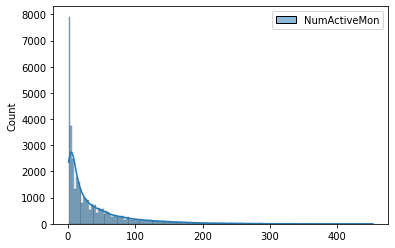

In [102]:
sns.histplot(data=df_filtered[['NumActiveMon']].dropna(), kde=True)

<AxesSubplot: ylabel='Count'>

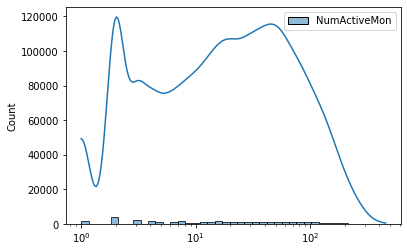

In [103]:
sns.histplot(data=df_filtered[['NumActiveMon']].dropna(), kde=True, log_scale=True)

<AxesSubplot: ylabel='Count'>

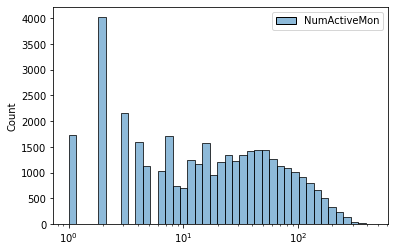

In [106]:
sns.histplot(data=df_filtered[['NumActiveMon']].dropna(), log_scale=True)

<AxesSubplot: ylabel='Count'>

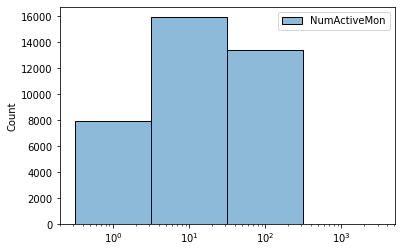

In [105]:
sns.histplot(data=df_filtered[['NumActiveMon']].dropna(), discrete=True, log_scale=True)

In [107]:
df['CommitDateRange']=df['LatestCommitDate']-df['EarliestCommitDate']
df[['EarliestCommitDate','LatestCommitDate','CommitDateRange','NumActiveMon']]

,EarliestCommitDate,LatestCommitDate,CommitDateRange,NumActiveMon
ProjectID,,,,
Jackeagle_kernel_msm-3.18,1988-01-05 07:17:15+00:00,2085-06-18 15:57:19+00:00,35594 days 08:40:04,364
bloomberg_chromium.bb,1988-01-05 07:17:15+00:00,2097-03-18 18:54:57+00:00,39885 days 11:37:42,305
buildroot_buildroot,2000-05-14 04:16:35+00:00,2021-11-24 02:32:46+00:00,7863 days 22:16:11,259
jayanta525_openwrt-nanopi-r4s,1988-01-05 07:17:15+00:00,2021-11-26 22:10:53+00:00,12379 days 14:53:38,260
openssl_openssl,1998-10-05 20:12:28+00:00,2021-11-24 03:32:47+00:00,8450 days 07:20:19,277
...,...,...,...,...
stong_CVE-2020-15368,2021-06-29 04:37:48+00:00,2021-10-29 07:46:53+00:00,122 days 03:09:05,5
clio_ten_years_rails,2018-04-16 16:32:49+00:00,2021-10-22 17:44:59+00:00,1285 days 01:12:10,28
badsaarow_commcode2sql,2018-02-12 09:58:42+00:00,2021-11-02 13:27:44+00:00,1359 days 03:29:02,14


In [108]:
df_filtered.columns

Index(['RootFork', 'EarliestCommitDate', 'LatestCommitDate', 'NumActiveMon',
       'NumAuthors', 'NumCore', 'CommunitySize', 'NumCommits', 'NumBlobs',
       'NumFiles', 'NumForks', 'NumStars', 'NumCore/NumAuthors'],
      dtype='object')

In [136]:
df['CommitDateRange [days]']=df['CommitDateRange'].dt.days
df['CommitDateRange [days]']

ProjectID
Jackeagle_kernel_msm-3.18        35594.0
bloomberg_chromium.bb            39885.0
buildroot_buildroot               7863.0
jayanta525_openwrt-nanopi-r4s    12379.0
openssl_openssl                   8450.0
                                  ...   
stong_CVE-2020-15368               122.0
clio_ten_years_rails              1285.0
badsaarow_commcode2sql            1359.0
kernelmethod_face_remover          468.0
ScratchAddons_website              236.0
Name: CommitDateRange [days], Length: 37367, dtype: float64

In [139]:
df.describe()

,NumActiveMon,NumAuthors,NumCore,CommunitySize,NumCommits,NumBlobs,NumFiles,NumForks,NumStars,NumCore/NumAuthors,CommitDateRange,CommitDateRange [Mon],NumActiveMon [%],CommitDateRange [days]
count,37359.000000,36717.000000,36717.000000,37353.000000,3.712200e+04,3.735500e+04,3.735500e+04,37353.000000,20781.000000,36717.000000,37359,37359.000000,37359.000000,37359.000000
mean,36.971948,122.309203,19.795517,193.313629,1.058411e+04,2.343997e+04,1.394070e+04,195.406179,1027.231269,0.527161,1854 days 03:15:49.901549856,60.900211,58.078174,1853.641050
std,49.217411,1433.092674,539.196746,2990.991122,2.456707e+05,3.045360e+05,2.926235e+05,2455.997305,7499.875281,0.353986,2069 days 03:27:49.529624832,67.972573,33.429966,2069.134379
min,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,1.000000,0.002786,0 days 00:00:00,0.000000,1.379310,0.000000
25%,4.000000,1.000000,1.000000,1.000000,2.400000e+01,1.380000e+02,4.300000e+01,0.000000,2.000000,0.214634,587 days 21:01:53,19.000000,27.027027,587.000000
50%,17.000000,5.000000,2.000000,2.000000,1.450000e+02,5.840000e+02,2.640000e+02,1.000000,11.000000,0.475120,1284 days 00:12:17,42.000000,60.000000,1284.000000
75%,50.000000,27.000000,5.000000,10.000000,9.910000e+02,3.658500e+03,1.514500e+03,10.000000,108.000000,1.000000,2466 days 09:26:16,81.000000,93.181818,2466.000000
max,1093.000000,147142.000000,97996.000000,397005.000000,3.646839e+07,3.604579e+07,4.307279e+07,237104.000000,467739.000000,1.000000,81273 days 12:13:34,2671.000000,200.000000,81273.000000


<AxesSubplot: xlabel='CommitDateRange [days]', ylabel='Count'>

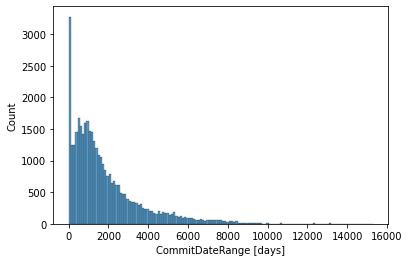

In [140]:
df_filtered=df[df['LatestCommitDate']<'2022-05-30']
sns.histplot(data=df_filtered['CommitDateRange [days]'].dropna())

In [121]:
df['CommitDateRange [Mon]']=\
12 * (df['LatestCommitDate'].dt.year  - df['EarliestCommitDate'].dt.year) +\
     (df['LatestCommitDate'].dt.month - df['EarliestCommitDate'].dt.month)

#df['CommitDateRange [Mon]'].astype('int')

### Project activity

In [124]:
df['NumActiveMon [%]']=100.0*df['NumActiveMon']/(df['CommitDateRange [Mon]']+1)

In [125]:
df[['EarliestCommitDate','LatestCommitDate','CommitDateRange','CommitDateRange [Mon]','NumActiveMon','NumActiveMon [%]']]

,EarliestCommitDate,LatestCommitDate,CommitDateRange,CommitDateRange [Mon],NumActiveMon,NumActiveMon [%]
ProjectID,,,,,,
Jackeagle_kernel_msm-3.18,1988-01-05 07:17:15+00:00,2085-06-18 15:57:19+00:00,35594 days 08:40:04,1169.0,364,31.111111
bloomberg_chromium.bb,1988-01-05 07:17:15+00:00,2097-03-18 18:54:57+00:00,39885 days 11:37:42,1310.0,305,23.264683
buildroot_buildroot,2000-05-14 04:16:35+00:00,2021-11-24 02:32:46+00:00,7863 days 22:16:11,258.0,259,100.0
jayanta525_openwrt-nanopi-r4s,1988-01-05 07:17:15+00:00,2021-11-26 22:10:53+00:00,12379 days 14:53:38,406.0,260,63.882064
openssl_openssl,1998-10-05 20:12:28+00:00,2021-11-24 03:32:47+00:00,8450 days 07:20:19,277.0,277,99.640288
...,...,...,...,...,...,...
stong_CVE-2020-15368,2021-06-29 04:37:48+00:00,2021-10-29 07:46:53+00:00,122 days 03:09:05,4.0,5,100.0
clio_ten_years_rails,2018-04-16 16:32:49+00:00,2021-10-22 17:44:59+00:00,1285 days 01:12:10,42.0,28,65.116279
badsaarow_commcode2sql,2018-02-12 09:58:42+00:00,2021-11-02 13:27:44+00:00,1359 days 03:29:02,45.0,14,30.434783


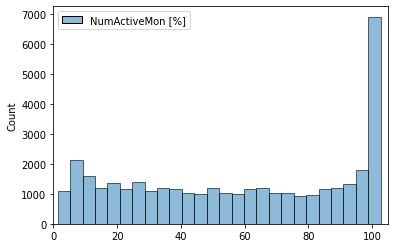

In [132]:
df_filtered=df[df['LatestCommitDate']<'2022-05-30']
sns.histplot(data=df_filtered[['NumActiveMon [%]']].dropna())
plt.xlim((0,105))
plt.show()

<AxesSubplot: ylabel='Count'>

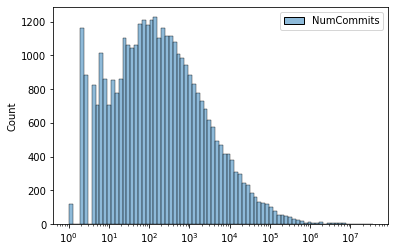

In [144]:
sns.histplot(data=df[['NumCommits']].dropna(), log_scale=True)

In [145]:
df['NumCommits/NumActiveMon']=df['NumCommits']/df['NumActiveMon']
df[['NumCommits/NumActiveMon']].describe()

,NumCommits/NumActiveMon
count,37122.000000
mean,94.327159
std,1992.040785
min,1.000000
25%,4.000000
50%,9.112698
75%,25.514935
max,247893.000000


In [147]:
print(f"month has ~= {30} days")
print(f"month has ~= {30*24} hours")
print(f"month has ~= {30*24*60} minutes")
print(f"month has ~= {30*24*60*60} seconds")
df[['NumCommits/NumActiveMon']].max()

month has ~= 30 days
month has ~= 720 hours
month has ~= 43200 minutes
month has ~= 2592000 seconds


NumCommits/NumActiveMon    247893.0
dtype: float64

In [146]:
df[['NumCommits','NumCommits/NumActiveMon']].idxmax()

NumCommits                 Jackeagle_kernel_msm-3.18
NumCommits/NumActiveMon           spiderworthy_linux
dtype: object

### Number of developers

Core authors (**NumCore**) are devs who make 80+% of the commits

In [9]:
df['NumCore/NumAuthors']=df['NumCore']/df['NumAuthors']
df['NumCore/NumAuthors'].describe()

count    36717.000000
mean         0.527161
std          0.353986
min          0.002786
25%          0.214634
50%          0.475120
75%          1.000000
max          1.000000
Name: NumCore/NumAuthors, dtype: float64

<AxesSubplot: title={'center': 'NumCore/NumAuthors histogram'}, ylabel='Frequency'>

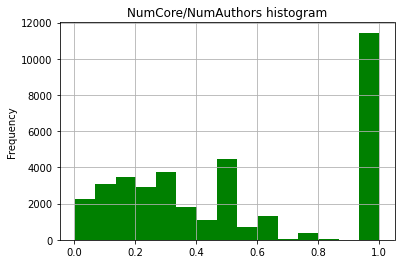

In [35]:
df['NumCore/NumAuthors'].dropna().plot.hist(bins=15,
                                            xlabel='NumCore/NumAuthors',ylabel='Projects',
                                            title='NumCore/NumAuthors histogram',
                                            grid=True,color='g')

<AxesSubplot: title={'center': 'NumCore/NumAuthors KDE'}, ylabel='Density'>

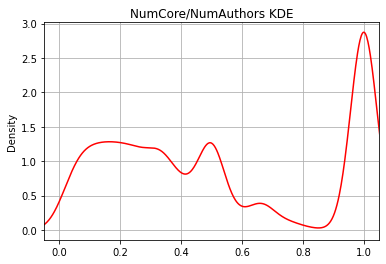

In [36]:
df['NumCore/NumAuthors'].dropna().plot.kde(xlim=(-0.05,1.05),
                                           xlabel='NumCore/NumAuthors',ylabel='Projects',
                                           title='NumCore/NumAuthors KDE',
                                           grid=True,color='r')

<AxesSubplot: ylabel='Count'>

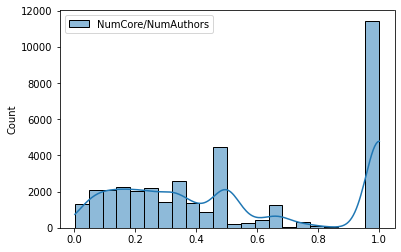

In [39]:
sns.histplot(data=df[['NumCore/NumAuthors']].dropna(), kde=True)

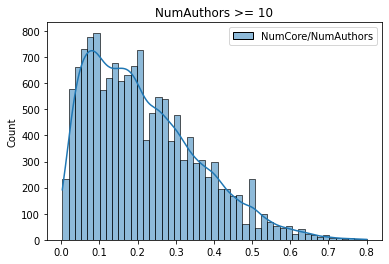

In [74]:
sns.histplot(data=df[df['NumAuthors']>=10][['NumCore/NumAuthors']].dropna(), kde=True)
plt.title("NumAuthors >= 10")
plt.show()

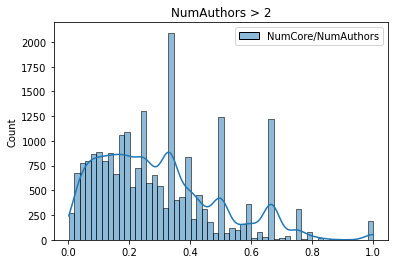

In [75]:
sns.histplot(data=df[df['NumAuthors']>2][['NumCore/NumAuthors']].dropna(), kde=True)
plt.title("NumAuthors > 2")
plt.show()

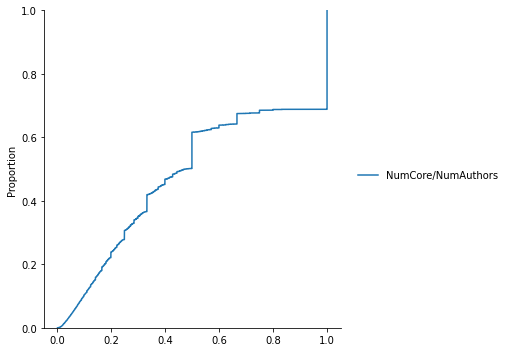

In [42]:
sns.displot(data=df[['NumCore/NumAuthors']].dropna(), kind="ecdf")

<AxesSubplot: ylabel='Count'>

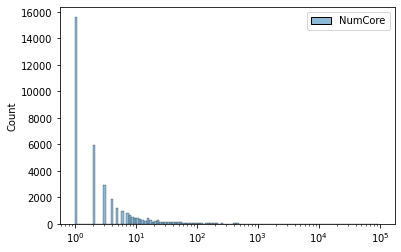

In [71]:
sns.histplot(data=df[['NumCore']].dropna(),log_scale=True)

<AxesSubplot: ylabel='Count'>

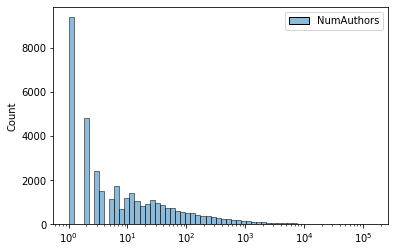

In [76]:
sns.histplot(data=df[['NumAuthors']].dropna(),log_scale=True)

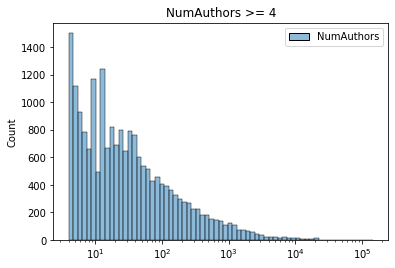

In [78]:
min_authors=4
sns.histplot(data=df[df['NumAuthors']>=min_authors][['NumAuthors']].dropna(),log_scale=True)
plt.title(f'NumAuthors >= {min_authors}')
plt.show()

In [95]:
print(df.shape)
print(f"{df['NumAuthors'].count()} = {100.0*df['NumAuthors'].count()/df.shape[0]}% total projects")
print(f"{df[df['NumAuthors']>1]['NumAuthors'].count()} = "
      f"{100.0*df[df['NumAuthors']>1]['NumAuthors'].count()/df['NumAuthors'].count()}% (of with data) with NumAuthors > 1")
print(df[df['NumAuthors']>=4]['NumAuthors'].count())
print(df[df['NumAuthors']>=10]['NumAuthors'].count())

(37367, 13)
36717 = 98.26049723017636% total projects
27321 = 74.40967399297328% (of with data) with NumAuthors > 1
20093
14474


In [86]:
authors_cut_s = pd.cut(df['NumAuthors'],bins=[-1,1,2,4,8,16,32,100,1000,10000,np.inf])

In [89]:
authors_hist=authors_cut_s.value_counts().sort_index()
authors_hist

(-1.0, 1.0]          9396
(1.0, 2.0]           4832
(2.0, 4.0]           3900
(4.0, 8.0]           3493
(8.0, 16.0]          3582
(16.0, 32.0]         3261
(32.0, 100.0]        4025
(100.0, 1000.0]      3494
(1000.0, 10000.0]     679
(10000.0, inf]         55
Name: NumAuthors, dtype: int64

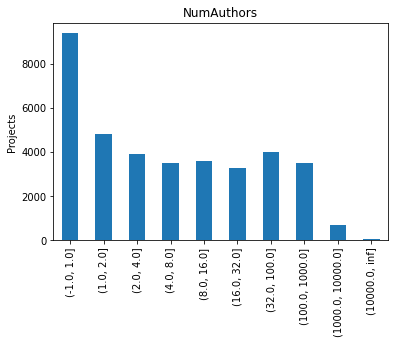

In [92]:
authors_hist.plot.bar(ylabel='Projects', title='NumAuthors')
plt.show()

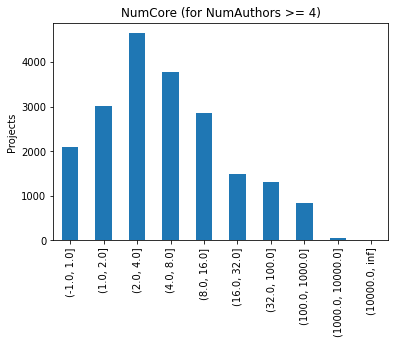

In [97]:
core_cut_s = pd.cut(df[df['NumAuthors']>=min_authors]['NumCore'],bins=[-1,1,2,4,8,16,32,100,1000,10000,np.inf])
core_hist=core_cut_s.value_counts().sort_index()
core_hist.plot.bar(ylabel='Projects', title=f'NumCore (for NumAuthors >= {min_authors})')
plt.show()

In [ ]:
limited_core_cut_s = pd.cut(df['NumCore'],bins=[-1,1,2,4,8,16,32,100,1000,10000,np.inf])
limited_core_hist=limited_core_cut_s.value_counts().sort_index()
limited_core_hist.plot.bar(ylabel='Projects', title='NumCore')
plt.show()

### Forks, shared commits, stars

The **CommunitySize** is the number of other projects that share commits with the deforked project

In [45]:
df[['NumForks','CommunitySize']].describe()

,NumForks,CommunitySize
count,37353.000000,37353.000000
mean,195.406179,193.313629
std,2455.997305,2990.991122
min,0.000000,1.000000
25%,0.000000,1.000000
50%,1.000000,2.000000
75%,10.000000,10.000000
max,237104.000000,397005.000000


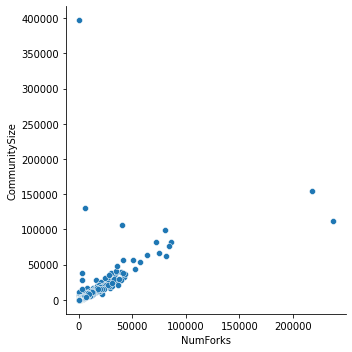

In [54]:
sns.relplot(df[['NumForks','CommunitySize']].dropna(),x='NumForks',y='CommunitySize')
plt.show()

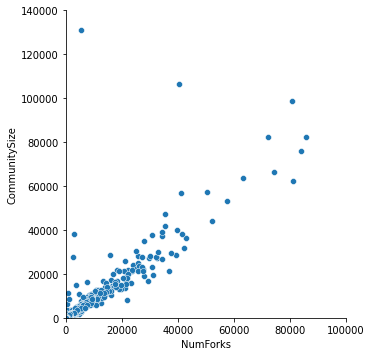

In [55]:
#fig, ax = plt.subplots()
sns.relplot(df[['NumForks','CommunitySize']].dropna(),x='NumForks',y='CommunitySize')

# set axes range
plt.xlim(0, 100000)
plt.ylim(0, 140000)

# plot figure
plt.show()

In [59]:
#sns.lmplot(data=df.dropna(),x='NumForks',y='CommunitySize')
#plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, 

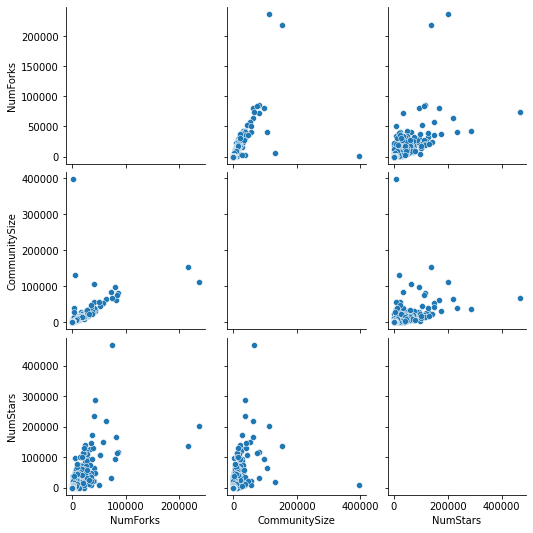

In [60]:
#sns.pairplot(data=df[['NumForks','CommunitySize','NumStars']].dropna())

### Literature

- _"GitHub Projects. Quality Analysis of Open-Source Software"_ (2014)

project quality:
- popularity: number of stars (e.g. log contributors\_count  vs  log log stargazers\_count)
   - skipped...
- issue survival rate
   - _Kaplan-Meier_ estimates of survival time for issues of a given project (to avoid "censoring" effect)
   - summarize the survival curve for each project with just two numbers: the percentage of issues closed after 3 and 365 days<br>from PCA on computed survival probabilities for issues after 1, 2, 3, 7, 30, 100, and 365 days)
   - _binomial regression_ (a variant of logistic regression)
   - **Table 2.** Regression coefficients for short and long term bug survival
      - many of significant features are not available in World of Code dataset (only ~= 'repo.created\_at')

dataset: 2000 of GitHub projects with the highest increase in popularity during a month.

Logarithmic transformation $x' = log_{10}(x + 10)$ has been applied to some of attributes to **decrease the skew due to power-law behavior**



-----
- _"Understanding the Factors that Impact the Popularity of GitHub Repositories"_ (2016)

skipped for now

----
- _"Why Modern Open Source Projects Fail"_ (2017)

dataset:

- survey with the maintainers of 104 popular GitHub systems that have been deprecated,
   - 154 + 36 responses - some projects considered finished, some moved development outside GitHub or outside main branch
- out of sent questionaire to developers with a public e-mail address of 414 open source projects, with evidences of no longer being under maintenance.
- out of 542 popular GitHub projects without any commits in the last year + 76 projects with deprecation in README
- out of top-5,000 most popular projects on GitHub (on September, 2016), using number of stars as a proxy

features compatibile with World of Code dataset (maybe)
- presence of README / README.md
- presence of license file (under different names)
- presence of file with contributor guidelines (under different names)
- presence of issue template / pull request template
- presence of code of conduct
- presence of Travis CI (or nowadays of / GitHub Actions / GitLab / Bitbucket CI/CD) configuration file

correlation, Mann-Whitney test at p-value = 0.05, and Cliff’s delta: "small" for 0.147 < d < 0.33, "medium" for 0.33 <= d < 0.474, and "large" for d >= 0.474.

----
- _"Identifying Unmaintained Projects in GitHub"_ (2018)

- train machine learning models to identify unmaintained or sparsely maintained projects, based on a set of features about project activity (commits, forks, issues, etc).
- precision of 80%, based on the feedback of real open source developers (129 GitHub projects); and a recall of 96%.

dataset:
- start with the top-10,000 most starred projects on GitHub (in November, 2017).
- remove 2,810 repositories that have less than two years from the first to the last commit
- remove 331 projects with null size, measured in lines of code
- remove 74 non-software projects, which are identified by searching for the following topics: _books_ and _awesome-lists_.
- end up with a list of 6,785 projects.

metrics: precision, recall, F-measure, accuracy, AUC (Area Under Curve), and Kappa,

**Table 1**: Features used to identify unmaintained projects (13 features).
- not all features are avaialable in World of Code dataset (most of them are not)

**Table 6**: Top-5 most relevant features, by Mean Decrease Accuracy (MDA).

----
- _"Characterization and Prediction of Popular Projects on GitHub"_ (2019)

...